In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 300

In [2]:
train = pd.read_csv("data/train.csv.gz")
test = pd.read_csv("data/test.csv.gz")

train = train.iloc[:, 1:]
test = test.iloc[:, 1:]

train["artists"] = train["artists"].str[1:-1].str.replace("'", "").str.split(",")
train["artist_ids"] = train["artist_ids"].str[1:-1].str.replace("'", "").str.split(",")

test["artists"] = test["artists"].str[1:-1].str.replace("'", "").str.split(",")
test["artist_ids"] = test["artist_ids"].str[1:-1].str.replace("'", "").str.split(",")

In [3]:
y_train = train["year"]
y_test = test["year"]

X_train = train.drop(["year", "decade"], axis=1)
X_test = test.drop(["year", "decade"], axis=1)

In [4]:
continuous_cols = ["explicit", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "num_artists"]
X_train = X_train[continuous_cols + ["primary_artist"]]
X_test = X_test[continuous_cols + ["primary_artist"]]

In [7]:
import category_encoders as ce

te = ce.TargetEncoder()
te.fit(X_train["primary_artist"], y_train)

X_train["primary_artist"] = te.transform(X_train["primary_artist"])

X_train["explicit"] = X_train["explicit"].astype(int)

X_test["primary_artist"] = te.transform(X_test["primary_artist"])
X_test["explicit"] = X_test["explicit"].astype(int)

In [8]:
X_train

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_artists,primary_artist
0,0,0.434,0.248,1,-17.622,1,0.0594,0.99400,0.804000,0.0968,0.2520,102.034,254693,4.0,1,2007.032433
1,0,0.585,0.187,9,-17.351,1,0.0428,0.86800,0.000000,0.2010,0.5310,98.907,208507,4.0,1,1978.529700
2,0,0.442,0.421,0,-6.483,1,0.1980,0.52900,0.000001,0.1130,0.9650,205.581,200293,3.0,1,2013.137622
3,0,0.338,0.212,7,-17.780,1,0.0949,0.84700,0.003370,0.1670,0.1790,81.949,640933,4.0,3,2003.890173
4,0,0.511,0.825,11,-10.767,1,0.0350,0.00281,0.033200,0.3590,0.8990,167.625,200707,4.0,1,1994.305755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771813,0,0.735,0.380,0,-9.730,1,0.0365,0.57700,0.439000,0.1500,0.4660,169.963,156671,3.0,1,2016.246368
771814,0,0.355,0.074,2,-17.670,1,0.0317,0.97600,0.928000,0.0892,0.0605,77.003,197667,4.0,1,2013.794955
771815,0,0.757,0.231,9,-11.634,1,0.0361,0.83000,0.000013,0.2980,0.6050,125.227,144627,4.0,1,2008.709622
771816,0,0.439,0.219,11,-14.741,1,0.0337,0.82800,0.001170,0.1430,0.4020,137.498,212693,3.0,1,1997.927018


In [9]:
from sklearn.model_selection import train_test_split

X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=88)

In [10]:
X_dev.shape, X_val.shape

((617454, 16), (154364, 16))

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
np.unique(y_dev)

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [18]:
model = keras.Sequential([
                        layers.Dense(16, input_shape=(16,)), 
                        layers.Activation("relu"), 
                        layers.Dense(16), 
                        layers.Activation("relu"), 
                        layers.Dense(8), 
                        layers.Activation("relu"), 
                        layers.Dense(4), 
                        layers.Activation("relu"),
                        layers.Dense(4), 
                        layers.Activation("relu"), 
                        layers.Dense(1), 
                        ])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 activation_5 (Activation)   (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 activation_7 (Activation)   (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 4)                

In [20]:
y_test

0         2006
1         2020
2         2007
3         2015
4         2016
          ... 
192950    2005
192951    1993
192952    2004
192953    2009
192954    2006
Name: year, Length: 192955, dtype: int64

In [21]:
y_dev.astype("float")

655031    2012.0
82364     2000.0
547361    2019.0
444452    2012.0
245712    2013.0
           ...  
90474     2007.0
657841    1995.0
298959    2005.0
104736    2003.0
387032    2008.0
Name: year, Length: 617454, dtype: float64

In [26]:
model.compile("adam", loss="mean_squared_error", metrics=["mean_squared_error"])
history_callback = model.fit(X_dev, y_dev, validation_data=(X_val, y_val), batch_size=256, epochs=50)

Epoch 1/50
2412/2412 [==============================] - 3s 1ms/step - loss: 272.4179 - mean_squared_error: 272.4179 - val_loss: 201.5206 - val_mean_squared_error: 201.5206
Epoch 2/50
2412/2412 [==============================] - 2s 850us/step - loss: 209.9028 - mean_squared_error: 209.9028 - val_loss: 52.3254 - val_mean_squared_error: 52.3254
Epoch 3/50
2412/2412 [==============================] - 2s 1ms/step - loss: 220.7143 - mean_squared_error: 220.7143 - val_loss: 97.7414 - val_mean_squared_error: 97.7414
Epoch 4/50
2412/2412 [==============================] - 3s 1ms/step - loss: 260.1540 - mean_squared_error: 260.1540 - val_loss: 2795.7910 - val_mean_squared_error: 2795.7910
Epoch 5/50
2412/2412 [==============================] - 2s 946us/step - loss: 271.4757 - mean_squared_error: 271.4757 - val_loss: 45.0759 - val_mean_squared_error: 45.0759
Epoch 6/50
2412/2412 [==============================] - 2s 1ms/step - loss: 178.6757 - mean_squared_error: 178.6757 - val_loss: 140.8644 - v

In [27]:
from sklearn.metrics import r2_score

dev_preds = model.predict(X_dev)

19296/19296 [==============================] - 10s 500us/step


In [28]:
r2_score(dev_preds, y_dev)

-0.10930729915453119

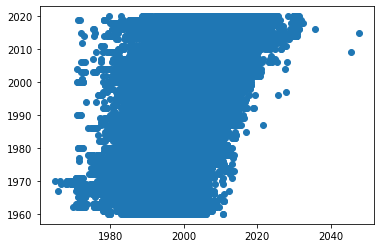

In [29]:
plt.scatter(dev_preds, y_dev)

In [31]:
model.compile("adam", loss="mean_squared_logarithmic_error", metrics=["mse"])
history_callback = model.fit(X_dev, y_dev, validation_data=(X_val, y_val), batch_size=256, epochs=50)

Epoch 1/50
2412/2412 [==============================] - 3s 936us/step - loss: 3.6496e-05 - mse: 151.3926 - val_loss: 2.0824e-05 - val_mse: 83.6641
Epoch 2/50
2412/2412 [==============================] - 2s 983us/step - loss: 3.3262e-05 - mse: 137.3437 - val_loss: 1.1114e-05 - val_mse: 44.5192
Epoch 3/50
2412/2412 [==============================] - 2s 986us/step - loss: 3.2425e-05 - mse: 131.6093 - val_loss: 1.4838e-05 - val_mse: 59.6247
Epoch 4/50
2412/2412 [==============================] - 3s 1ms/step - loss: 2.8107e-05 - mse: 113.5818 - val_loss: 1.4179e-05 - val_mse: 56.8507
Epoch 5/50
2412/2412 [==============================] - 3s 1ms/step - loss: 3.9665e-05 - mse: 160.3682 - val_loss: 1.2463e-05 - val_mse: 50.0090
Epoch 6/50
2412/2412 [==============================] - 3s 1ms/step - loss: 3.1697e-05 - mse: 128.2083 - val_loss: 1.1019e-05 - val_mse: 44.1309
Epoch 7/50
2412/2412 [==============================] - 3s 1ms/step - loss: 3.0773e-05 - mse: 124.2317 - val_loss: 1.1530e-0

In [32]:
dev_preds = model.predict(X_dev)
r2_score(dev_preds, y_dev)

19296/19296 [==============================] - 10s 499us/step


-0.40443730324397764